# Import Libraries and dataset

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

# Category 3.0

In [2]:
# Players to be selected
# li = ["Barisal","Bhola","Khepupara","Khulna","Mongla","Patuakhali","Hatiya"]

li = ['Dinajpur','Syedpur','Rangpur','Bogra','Mymensingh',"Rajshahi"]
df_new=df[df.Station_Names.isin(li)]
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
1356,25.8,11.7,8.140625,74.21875,0.875926,1.1,7.296226,435303.7,751187.5,24.88,89.36,1948.01
1357,27.5,11.9,8.140625,74.21875,0.875926,0.7,7.296226,435303.7,751187.5,24.88,89.36,1949.01
1358,25.8,11.7,0.000000,68.00000,0.875926,0.8,7.296226,435303.7,751187.5,24.88,89.36,1950.01
1359,25.8,11.7,5.000000,71.00000,0.875926,0.7,7.296226,435303.7,751187.5,24.88,89.36,1951.01
1360,33.2,12.3,0.000000,66.00000,0.875926,1.0,7.296226,435303.7,751187.5,24.88,89.36,1952.01


In [3]:
z = df_new["Wind_Speed"]

# df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR",], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,Period,Wind_Speed
1356,25.8,11.7,8.140625,74.21875,1.1,7.296226,24.88,89.36,1948.01,0.875926
1357,27.5,11.9,8.140625,74.21875,0.7,7.296226,24.88,89.36,1949.01,0.875926
1358,25.8,11.7,0.000000,68.00000,0.8,7.296226,24.88,89.36,1950.01,0.875926
1359,25.8,11.7,5.000000,71.00000,0.7,7.296226,24.88,89.36,1951.01,0.875926
1360,33.2,12.3,0.000000,66.00000,1.0,7.296226,24.88,89.36,1952.01,0.875926


In [4]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Preprocessiong with Standard Scaler 

In [6]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# Random Forest Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

#  Prediction
Y_pred_RF = regressor.predict(testX)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred_RF})
df_temp.head()

,Actual,Predicted
14278,0.5,0.969000
13640,0.3,0.592778
6537,0.3,0.489000
13590,1.0,0.991241
16276,2.2,1.757000


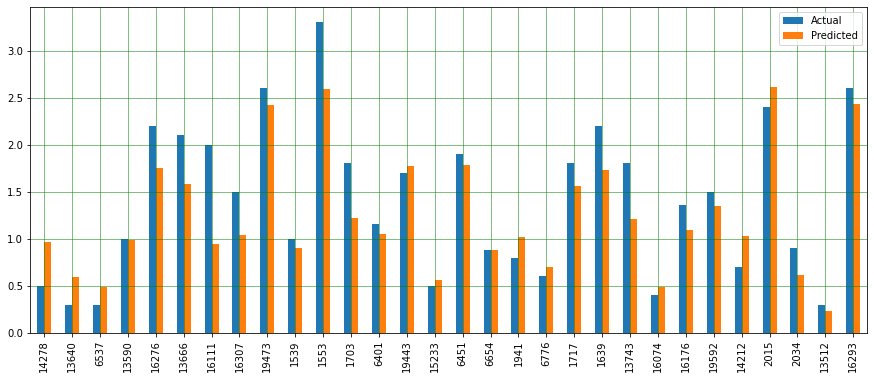

In [8]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [9]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred_RF)
score

0.814989392433833

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred_RF)))

Mean Absolute Error: 0.2161284216874214
Mean Squared Error: 0.09860783920964658
Root Mean Squared Error: 0.3140188516787592


# XGBoost Regression

In [11]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(trainX_scaled,trainY)
prediction_XGB=XGB.predict(testX_scaled)

[14:36:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': prediction_XGB})
df_temp.head()

,Actual,Predicted
14278,0.5,0.129268
13640,0.3,0.782958
6537,0.3,0.704746
13590,1.0,1.215409
16276,2.2,2.109729


In [13]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, prediction_XGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_XGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_XGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_XGB)))

R2 Value: 0.807733550423692
Mean Absolute Error: 0.2302899833605189
Mean Squared Error: 0.10247509261570165
Root Mean Squared Error: 0.3201173107092174


# MLP Regression

In [14]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [15]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
14278,0.5,0.942574
13640,0.3,0.432847
6537,0.3,0.633832
13590,1.0,0.971097
16276,2.2,1.902421


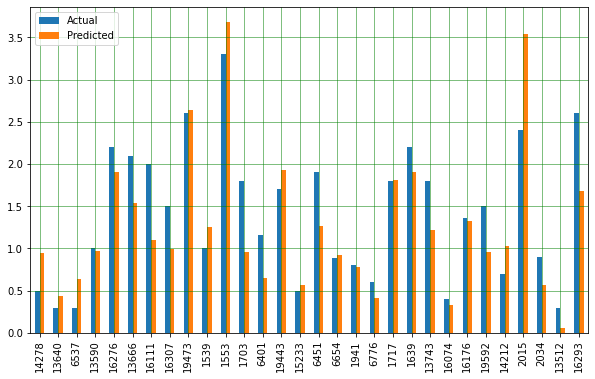

In [16]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

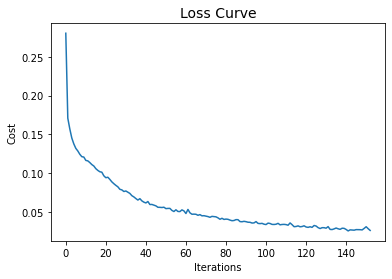

In [17]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [18]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.6690587207096051

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
14278,0.5,0.472679
13640,0.3,0.570229
6537,0.3,0.830431
13590,1.0,1.239374
16276,2.2,1.992727


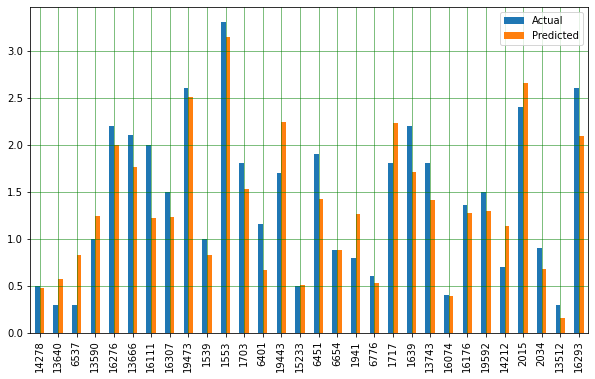

In [21]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [23]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, grid_predictions))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

R2 Value: 0.733662458911652
Mean Absolute Error: 0.2696326869364432
Mean Squared Error: 0.14195385752538428
Root Mean Squared Error: 0.3767676439470145


In [47]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'pred_RF': Y_pred_RF,'pred_XGB':prediction_XGB,'pred_MLP': grid_predictions,'mean_pred':mean_pred})
df_temp2.head()

,Actual,pred_RF,pred_XGB,pred_MLP,mean_pred
14278,0.5,0.969000,0.129268,0.472679,0.523649
13640,0.3,0.592778,0.782958,0.570229,0.648655
6537,0.3,0.489000,0.704746,0.830431,0.674726
13590,1.0,0.991241,1.215409,1.239374,1.148675
16276,2.2,1.757000,2.109729,1.992727,1.953152


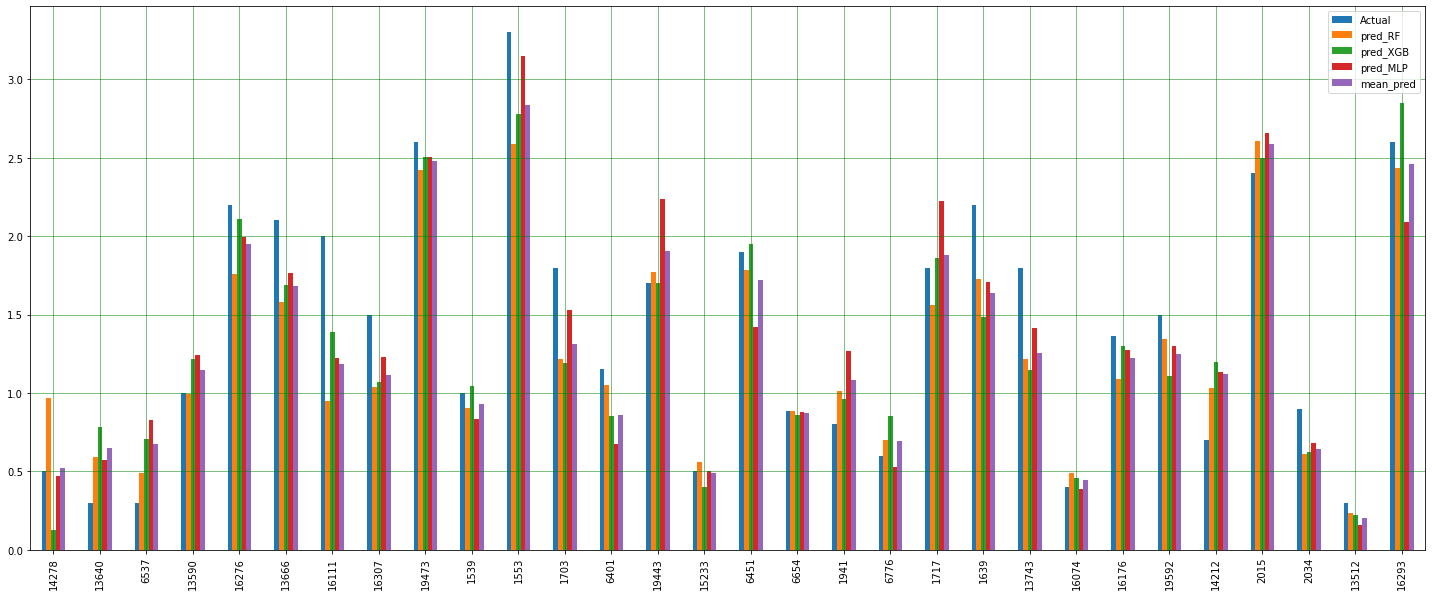

In [49]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [27]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'mean_pred':mean_pred})
df_temp2.head()

,Actual,mean_pred
14278,0.5,0.523649
13640,0.3,0.648655
6537,0.3,0.674726
13590,1.0,1.148675
16276,2.2,1.953152


In [30]:
print('R2 Value:',metrics.r2_score(testY, mean_pred)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, mean_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, mean_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, mean_pred)))

R2 Value: 82.82573786601601 %
Mean Absolute Error: 0.21401828874414844
Mean Squared Error: 0.0915362044009583
Root Mean Squared Error: 0.302549507355339
